In [42]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [43]:
with open('E:/DL/datasets/CBOW.txt','r') as f:
    data = f.read()

In [44]:
data

'The speed of transmission is an important point of difference between the two viruses. Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus. The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days. This means that influenza can spread faster than COVID-19. \n\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission â€“transmission of the virus before the appearance of symptoms â€“ is a major driver of transmission for influenza. In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission. \n\nThe reproductive number â€“ the number of secondary infections generated from one infected individual â€“ is understood to 

In [45]:
lines = data.split('.')

In [46]:
lines

['The speed of transmission is an important point of difference between the two viruses',
 ' Influenza has a shorter median incubation period (the time from infection to appearance of symptoms) and a shorter serial interval (the time between successive cases) than COVID-19 virus',
 ' The serial interval for COVID-19 virus is estimated to be 5-6 days, while for influenza virus, the serial interval is 3 days',
 ' This means that influenza can spread faster than COVID-19',
 ' \n\nFurther, transmission in the first 3-5 days of illness, or potentially pre-symptomatic transmission â€“transmission of the virus before the appearance of symptoms â€“ is a major driver of transmission for influenza',
 ' In contrast, while we are learning that there are people who can shed COVID-19 virus 24-48 hours prior to symptom onset, at present, this does not appear to be a major driver of transmission',
 ' \n\nThe reproductive number â€“ the number of secondary infections generated from one infected individ

In [47]:
clean_sent = []
for line in lines:
  if line == "":
    continue
  line = re.sub('[^A-Za-z0-9]+', ' ', line)
  line = re.sub(r'\b\w\b', ' ', line)
  line = line.lower()
  clean_sent.append(line)

clean_sent

['the speed of transmission is an important point of difference between the two viruses',
 ' influenza has   shorter median incubation period the time from infection to appearance of symptoms and   shorter serial interval the time between successive cases than covid 19 virus',
 ' the serial interval for covid 19 virus is estimated to be     days while for influenza virus the serial interval is   days',
 ' this means that influenza can spread faster than covid 19',
 ' further transmission in the first     days of illness or potentially pre symptomatic transmission transmission of the virus before the appearance of symptoms is   major driver of transmission for influenza',
 ' in contrast while we are learning that there are people who can shed covid 19 virus 24 48 hours prior to symptom onset at present this does not appear to be   major driver of transmission',
 ' the reproductive number the number of secondary infections generated from one infected individual is understood to be betwee

In [48]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [49]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

[[1, 33, 2, 3, 9, 34, 35, 36, 2, 37, 12, 1, 38, 20], [4, 39, 21, 40, 41, 42, 1, 13, 22, 43, 10, 23, 2, 24, 11, 21, 14, 15, 1, 13, 12, 44, 45, 16, 5, 6, 7], [1, 14, 15, 8, 5, 6, 7, 9, 46, 10, 17, 18, 25, 8, 4, 7, 1, 14, 15, 9, 18], [26, 47, 27, 4, 28, 48, 49, 16, 5, 6], [50, 3, 29, 1, 51, 18, 2, 52, 53, 54, 55, 56, 3, 3, 2, 1, 7, 57, 1, 23, 2, 24, 9, 30, 31, 2, 3, 8, 4], [29, 58, 25, 59, 19, 60, 27, 61, 19, 62, 63, 28, 64, 5, 6, 7, 65, 66, 67, 68, 10, 69, 70, 71, 72, 26, 73, 74, 75, 10, 17, 30, 31, 2, 3], [1, 76, 32, 1, 32, 2, 77, 78, 79, 22, 80, 81, 82, 9, 83, 10, 17, 12, 11], [8, 5, 6, 7, 84, 16, 8, 4], [85, 86, 8, 87, 5, 6, 11, 4, 20, 19, 88, 89, 11, 13, 90, 91, 92, 93, 94, 95], []]


In [50]:
index_to_word = {}
word_to_index = {}

for i, seq in enumerate(sequences):
  words_in_sentence = clean_sent[i].split()
  for j,value in enumerate(seq):
    index_to_word[value] = words_in_sentence[j]
    word_to_index[words_in_sentence[j]] = value

print(index_to_word)
print('\n')
print(word_to_index)
    

{1: 'the', 33: 'speed', 2: 'of', 3: 'transmission', 9: 'is', 34: 'an', 35: 'important', 36: 'point', 37: 'difference', 12: 'between', 38: 'two', 20: 'viruses', 4: 'influenza', 39: 'has', 21: 'shorter', 40: 'median', 41: 'incubation', 42: 'period', 13: 'time', 22: 'from', 43: 'infection', 10: 'to', 23: 'appearance', 24: 'symptoms', 11: 'and', 14: 'serial', 15: 'interval', 44: 'successive', 45: 'cases', 16: 'than', 5: 'covid', 6: '19', 7: 'virus', 8: 'for', 46: 'estimated', 17: 'be', 18: 'days', 25: 'while', 26: 'this', 47: 'means', 27: 'that', 28: 'can', 48: 'spread', 49: 'faster', 50: 'further', 29: 'in', 51: 'first', 52: 'illness', 53: 'or', 54: 'potentially', 55: 'pre', 56: 'symptomatic', 57: 'before', 30: 'major', 31: 'driver', 58: 'contrast', 59: 'we', 19: 'are', 60: 'learning', 61: 'there', 62: 'people', 63: 'who', 64: 'shed', 65: '24', 66: '48', 67: 'hours', 68: 'prior', 69: 'symptom', 70: 'onset', 71: 'at', 72: 'present', 73: 'does', 74: 'not', 75: 'appear', 76: 'reproductive', 

In [51]:
vocab_size = len(tokenizer.word_index)+1
emb_size = 10
context_size = 2


contexts = []
targets = []

for seq in sequences:
  for i in range(context_size,len(seq)-context_size):
    target = seq[i]
    context = [seq[i-2],seq[i-1],seq[i+1],seq[i+2]]
    contexts.append(context)
    targets.append(target)

print(contexts)
print(targets)

[[1, 33, 3, 9], [33, 2, 9, 34], [2, 3, 34, 35], [3, 9, 35, 36], [9, 34, 36, 2], [34, 35, 2, 37], [35, 36, 37, 12], [36, 2, 12, 1], [2, 37, 1, 38], [37, 12, 38, 20], [4, 39, 40, 41], [39, 21, 41, 42], [21, 40, 42, 1], [40, 41, 1, 13], [41, 42, 13, 22], [42, 1, 22, 43], [1, 13, 43, 10], [13, 22, 10, 23], [22, 43, 23, 2], [43, 10, 2, 24], [10, 23, 24, 11], [23, 2, 11, 21], [2, 24, 21, 14], [24, 11, 14, 15], [11, 21, 15, 1], [21, 14, 1, 13], [14, 15, 13, 12], [15, 1, 12, 44], [1, 13, 44, 45], [13, 12, 45, 16], [12, 44, 16, 5], [44, 45, 5, 6], [45, 16, 6, 7], [1, 14, 8, 5], [14, 15, 5, 6], [15, 8, 6, 7], [8, 5, 7, 9], [5, 6, 9, 46], [6, 7, 46, 10], [7, 9, 10, 17], [9, 46, 17, 18], [46, 10, 18, 25], [10, 17, 25, 8], [17, 18, 8, 4], [18, 25, 4, 7], [25, 8, 7, 1], [8, 4, 1, 14], [4, 7, 14, 15], [7, 1, 15, 9], [1, 14, 9, 18], [26, 47, 4, 28], [47, 27, 28, 48], [27, 4, 48, 49], [4, 28, 49, 16], [28, 48, 16, 5], [48, 49, 5, 6], [50, 3, 1, 51], [3, 29, 51, 18], [29, 1, 18, 2], [1, 51, 2, 52], [51,

In [52]:
X = np.array(contexts)
Y = np.array(targets)

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense,Lambda

In [54]:
model = Sequential([
  Embedding(input_dim=vocab_size,output_dim=emb_size,input_length=2*context_size),
  Lambda(lambda x: tf.reduce_mean(x,axis=1)),
  Dense(256,activation='relu'),
  Dense(512,activation='relu'),
  Dense(vocab_size,activation='softmax')
])

e:\DL\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [55]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [56]:
history = model.fit(X,Y,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0243 - loss: 4.5642
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0429 - loss: 4.5527
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0896 - loss: 4.5374
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0591 - loss: 4.5104
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0704 - loss: 4.4550
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0715 - loss: 4.3789
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0628 - loss: 4.2474
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0524 - loss: 4.1834
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0533 - loss: 4.1330
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0729 - loss: 4.0734
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0710 - loss: 3.9698
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0882 - loss: 3.9350
E

In [57]:
for i in range(5):
  words = []
  target = index_to_word.get(targets[i])
  for j in contexts[i]:
    words.append(index_to_word.get(j))
  print(words,"->",target)

['the', 'speed', 'transmission', 'is'] -> of
['speed', 'of', 'is', 'an'] -> transmission
['of', 'transmission', 'an', 'important'] -> is
['transmission', 'is', 'important', 'point'] -> an
['is', 'an', 'point', 'of'] -> important


<Axes: >

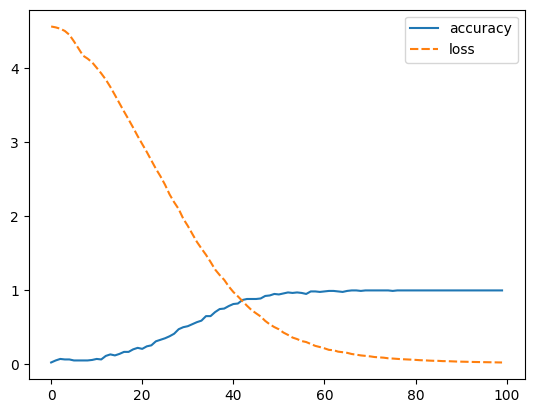

In [58]:
import seaborn as sns
sns.lineplot(model.history.history)

In [59]:
word_embeddings = model.layers[0].get_weights()[0]
word_embeddings

array([[-0.02407911, -0.00393081, -0.01725466, -0.03430531, -0.02772772,
        -0.03768816, -0.01544816, -0.01786221, -0.00799599,  0.04582885],
       [ 0.09402268, -0.2912523 , -0.1700941 , -0.1803708 ,  0.07604751,
        -0.07378204,  0.22868137,  0.19978075,  0.17430532,  0.06251156],
       [-0.16769378,  0.04697562,  0.15215339,  0.407233  , -0.30634767,
         0.24673292, -0.25288   , -0.13032703,  0.02530595,  0.17239386],
       [-0.21311653,  0.12960717,  0.3370085 , -0.22509903, -0.09526118,
         0.26686564,  0.0284301 ,  0.12163308,  0.07179834, -0.34386623],
       [-0.02534065,  0.39437443,  0.00312117,  0.15642168, -0.12264993,
         0.05105959, -0.18751283, -0.01026786, -0.01933001, -0.02575806],
       [-0.25701123,  0.26613498, -0.0200352 ,  0.00090192,  0.16272065,
        -0.12959222, -0.01004838,  0.24507006,  0.05168797,  0.35246602],
       [-0.13814001,  0.22909454, -0.27357027,  0.39132193,  0.07614607,
        -0.21799494,  0.0490831 , -0.06057911

In [60]:
from sklearn.manifold import TSNE

In [61]:
tsne = TSNE(n_components=2,random_state=42)
word_embeddings_2d = tsne.fit_transform(word_embeddings)
word_embeddings_2d

array([[-0.9348204 ,  0.04984537],
       [-3.6915364 ,  3.0648725 ],
       [ 2.0037541 , -2.5500185 ],
       [ 2.8395665 ,  5.421537  ],
       [ 2.599375  , -0.65296173],
       [-0.7932457 ,  1.8613156 ],
       [ 2.1377227 ,  0.9320146 ],
       [ 3.093381  ,  2.4368255 ],
       [-1.6071684 ,  0.13922112],
       [-1.5006574 ,  1.6357614 ],
       [ 1.4194379 ,  6.7880282 ],
       [ 3.0820622 , -4.4718456 ],
       [ 3.1379418 ,  4.1837535 ],
       [-1.2034836 ,  3.0482395 ],
       [ 2.72393   ,  2.4147484 ],
       [ 4.2380724 ,  2.9162133 ],
       [-4.475341  , -0.36111683],
       [ 1.2913768 , -2.3005803 ],
       [ 1.8913095 ,  2.6735535 ],
       [-1.1424611 , -2.4768648 ],
       [ 4.0799017 ,  1.2174755 ],
       [-1.77477   ,  1.0879277 ],
       [ 0.20740663,  0.18447445],
       [-0.3572398 ,  4.4505305 ],
       [ 4.1684127 ,  4.5422387 ],
       [ 5.414839  ,  0.84381384],
       [-1.8414575 , -2.4042487 ],
       [ 4.755746  ,  1.5586833 ],
       [-1.8696818 ,

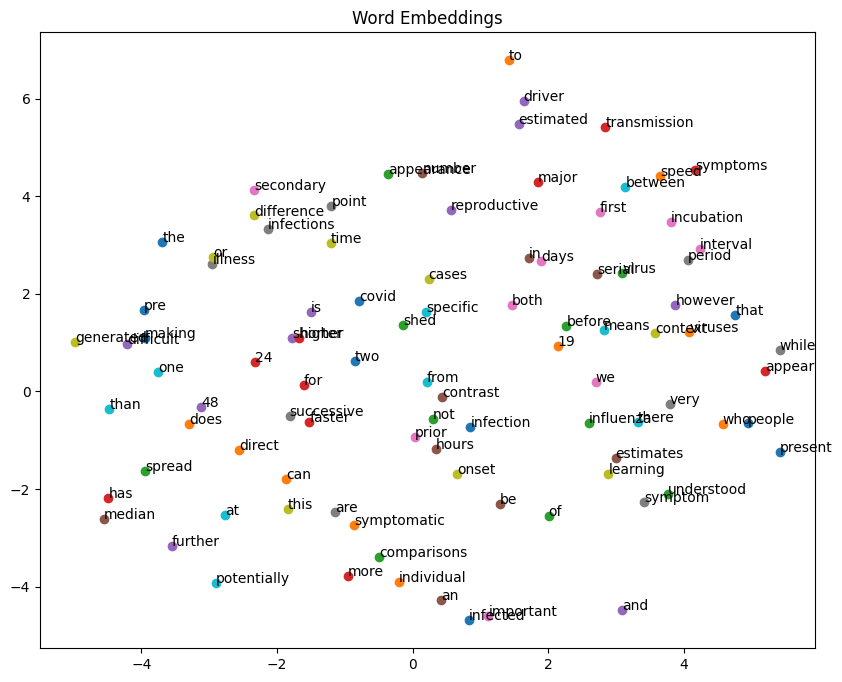

In [64]:
plt.figure(figsize=(10,8))
for word,idx in word_to_index.items():
  plt.scatter(word_embeddings_2d[idx,0],word_embeddings_2d[idx,1])
  plt.annotate(word,(word_embeddings_2d[idx,0],word_embeddings_2d[idx,1]))
plt.title('Word Embeddings')
plt.show()

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

target_word = 'influenza'
target_embedding = word_embeddings[word_to_index[target_word]]

similarities = cosine_similarity(target_embedding.reshape(1,-1),word_embeddings)[0]
most_similar_indices = similarities.argsort()[-5:][::-1]

most_similar_words = [index_to_word[idx] for idx in most_similar_indices]

print('Words most similar to',target_word,':',most_similar_words)

Words most similar to influenza : ['influenza', 'there', 'we', 'learning', 'comparisons']


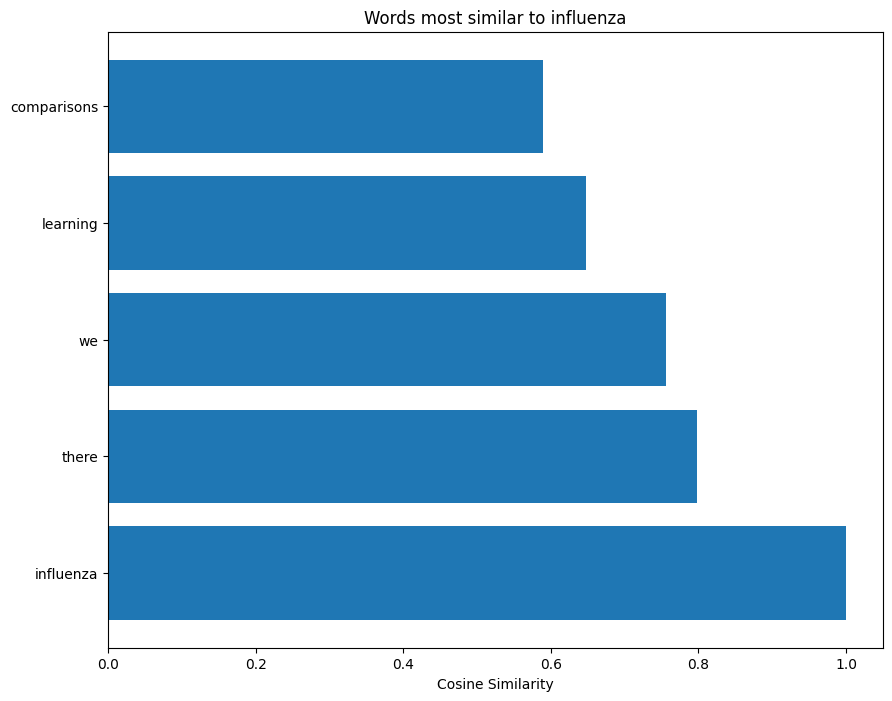

In [67]:
plt.figure(figsize=(10,8))
plt.barh(most_similar_words,similarities[most_similar_indices])
plt.xlabel('Cosine Similarity')
plt.title('Words most similar to '+target_word)
plt.show()